# Import libraries and some func of libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense
from keras.constraints import maxnorm
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras import metrics
from tensorflow.keras.layers import BatchNormalization
import time
import tensorflow as tf
import random

# Load Data

In [ ]:
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# preprocess

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


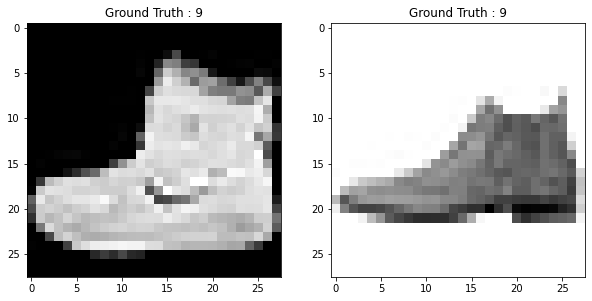

In [ ]:
# Checkout the Data
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)
 
# Find the unique numbers from the train labels
import numpy as np
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='binary')
plt.title("Ground Truth : {}".format(y_test[0]))

# Flatten the data 
# Change from matrix to array of dimension 28x28 to array of dimention 784
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:]))) #(60000, 784)
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))     #(10000, 784)

# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Noramlization from [0;255] to [0;1], Scale the data to lie between 0 to 1
X_train /= 255
X_test /= 255

# convert labels to one-hot vectors
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

# الف

## Create MLP Model and plot func

In [ ]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense
def MLP_TWO_HIDDENLAYRE():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))	#Hidden Layer 1
    model.add(Dense(512, activation='relu'))	#Hidden Layer 2
    model.add(Dense(10, activation='softmax')) #Last layer with one output per class
    model.summary()
    # Configure the Network
    tf.random.set_seed(10) 
    random.seed(10) 
    np.random.seed(10)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Plot the Accuracy Curves
def plot(history):
  fig = plt.figure(figsize=(15,6))
  fig.add_subplot(221)
  plt.plot(history.history['accuracy'],'r')
  plt.plot(history.history['val_accuracy'],'b')
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='lower right')
  plt.grid()

# Plot the Loss Curves
  fig.add_subplot(222)
  plt.plot(history.history['loss'],'r')
  plt.plot(history.history['val_loss'],'b')
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.grid()

## Train MLP Model batch=32,64,256 (Fitting)

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)

clf_32 = KerasClassifier(build_fn=MLP_TWO_HIDDENLAYRE, epochs=10)
history_32 = clf_32.fit(X_train, Y_train, batch_size=32, validation_split=0.2)
print('\n')
print('\n')
clf_64 = KerasClassifier(build_fn=MLP_TWO_HIDDENLAYRE, epochs=10)
history_64 = clf_64.fit(X_train, Y_train, batch_size=64, validation_split=0.2)
print('\n')
print('\n')
clf_256 = KerasClassifier(build_fn=MLP_TWO_HIDDENLAYRE, epochs=10)
history_256 = clf_256.fit(X_train, Y_train, batch_size=256, validation_split=0.2)
print('\n')
print('\n')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4790 - accuracy: 0.8268 - val_loss: 0.4036 - val_accuracy: 0.8492
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3632 - accuracy: 0.8662 - val_loss: 0.3555 - val_accuracy: 0.8720
Epoch 3/10
1500/1500 [==

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if __name__ == '__main__':


Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.4815 - accuracy: 0.8266 - val_loss: 0.3895 - val_accuracy: 0.8579
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3593 - accuracy: 0.8686 - val_loss: 0.3463 - val_accuracy: 0.8751
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3246 - accuracy: 0.8801 - val_loss: 0.3439 - val_accuracy: 0.8758
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3000 - accuracy: 0.8867 - val_loss: 0.3634 - val_accuracy: 0.8705
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2803 - accuracy: 0.8967 - val_loss: 0.3117 - val_accuracy: 0.8838
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2647 - accuracy: 0.9003 - val_loss: 0.3264 - val_accuracy: 0.8823
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2513 - accuracy: 0.9062 - val_loss: 0.3173 - val_accuracy: 0.8880
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  del sys.path[0]


Epoch 1/10
188/188 [==============================] - 2s 7ms/step - loss: 0.5381 - accuracy: 0.8100 - val_loss: 0.3884 - val_accuracy: 0.8599
Epoch 2/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3651 - accuracy: 0.8679 - val_loss: 0.3480 - val_accuracy: 0.8730
Epoch 3/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3309 - accuracy: 0.8781 - val_loss: 0.3486 - val_accuracy: 0.8734
Epoch 4/10
188/188 [==============================] - 1s 6ms/step - loss: 0.3021 - accuracy: 0.8885 - val_loss: 0.3310 - val_accuracy: 0.8769
Epoch 5/10
188/188 [==============================] - 1s 7ms/step - loss: 0.2854 - accuracy: 0.8954 - val_loss: 0.3080 - val_accuracy: 0.8880
Epoch 6/10
188/188 [==============================] - 1s 7ms/step - loss: 0.2619 - accuracy: 0.9041 - val_loss: 0.3216 - val_accuracy: 0.8848
Epoch 7/10
188/188 [==============================] - 1s 6ms/step - loss: 0.2542 - accuracy: 0.9047 - val_loss: 0.3303 - val_accuracy: 0.8816
Epoch 

## plot

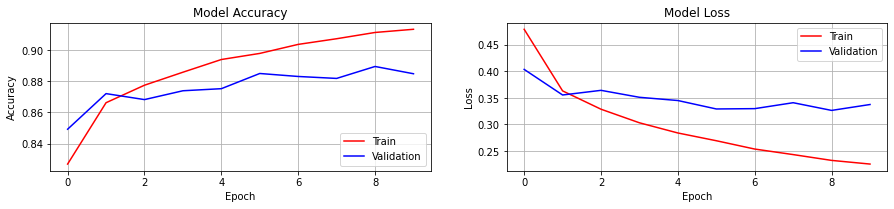

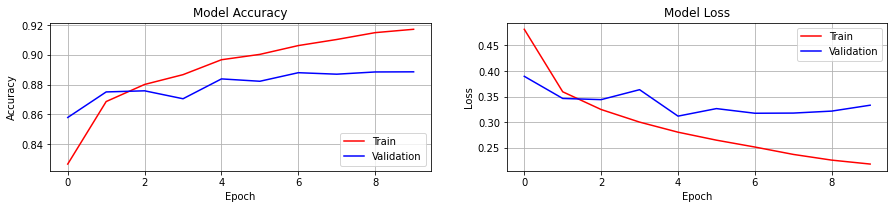

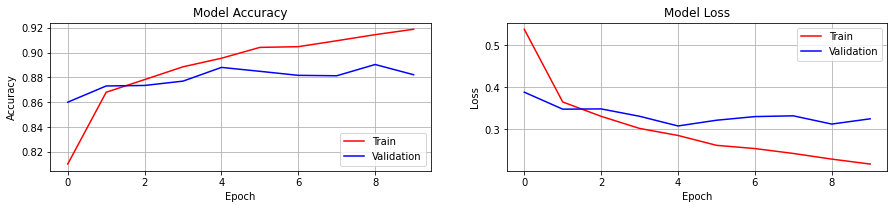

In [ ]:
plot(history_32)
plot(history_64)
plot(history_256)

## Evaluation , confusionmatrix and show image (actual label vs prdiction label)

 classified correctly When Batchsize is 32 = 8757
 classified incorrectly When Batchsize is 32 = 1243




 classified correctly When Batchsize is 64 = 8829
 classified incorrectly When Batchsize is 64 = 1171




 classified correctly When Batchsize is 256 = 8738
 classified incorrectly When Batchsize is 256 = 1262


----------------------------------------------------------------------------------
-----------------------------Accuracy and Loss for Test---------------------------
----------------------------------------------------------------------------------


Batchsize=32 
Accuracy Test for Batchsize_32: 87.57%
Loss Test for batchsize_32: 12.43%




Batchsize=64  
Accuracy Test for Batchsize_64: 88.29%
Loss Test for batchsize_64: 11.71%




Batchsize=256  
Accuracy Test for Batchsize_256: 87.38%
Loss Test for batchsize_256: 12.62%


----------------------------------------------------------------------------------
---------------------------------Confusion_matrix--------------------

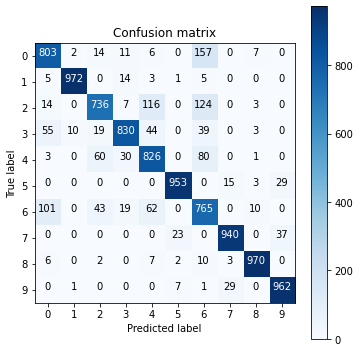

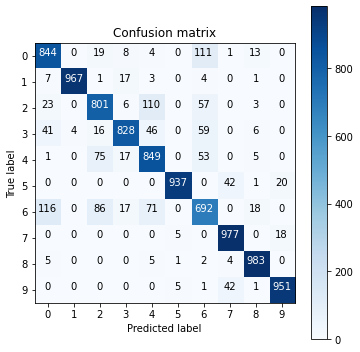

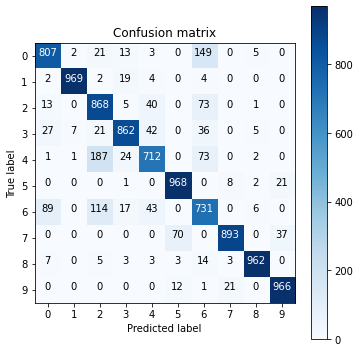

In [ ]:
# Prediction Labels
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)

Y_pred_32 = clf_32.predict(X_test)
acc_32 = accuracy_score(y_test, Y_pred_32)

Y_pred_64 = clf_64.predict(X_test)
acc_64= accuracy_score(y_test, Y_pred_64)

Y_pred_256 = clf_256.predict(X_test)
acc_256 = accuracy_score(y_test, Y_pred_256)

# Evaluate the trained model
correct_indices_32 = np.nonzero(Y_pred_32 == y_test)[0]
incorrect_indices_32 = np.nonzero(Y_pred_32 != y_test)[0]
loss_32=(len(incorrect_indices_32) / (len(incorrect_indices_32) + len(correct_indices_32)))

correct_indices_64 = np.nonzero(Y_pred_64 == y_test)[0]
incorrect_indices_64 = np.nonzero(Y_pred_64 != y_test)[0]
loss_64=(len(incorrect_indices_64) / (len(incorrect_indices_64) + len(correct_indices_64)))


correct_indices_256 = np.nonzero(Y_pred_256 == y_test)[0]
incorrect_indices_256 = np.nonzero(Y_pred_256 != y_test)[0]
loss_256=(len(incorrect_indices_256) / (len(incorrect_indices_256) + len(correct_indices_256)))

print(" classified correctly When Batchsize is 32 =" , len(correct_indices_32))
print(" classified incorrectly When Batchsize is 32 =", len(incorrect_indices_32))
print('\n')
print('\n')
print(" classified correctly When Batchsize is 64 =", len(correct_indices_64))
print(" classified incorrectly When Batchsize is 64 =", len(incorrect_indices_64))
print('\n')
print('\n')
print(" classified correctly When Batchsize is 256 =", len(correct_indices_256))
print(" classified incorrectly When Batchsize is 256 =", len(incorrect_indices_256))



from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1,2,3,4,5,6,7,8,9]
confusion_mtx_32 = confusion_matrix(y_test, Y_pred_32)
confusion_mtx_64 = confusion_matrix(y_test, Y_pred_64)
confusion_mtx_256 = confusion_matrix(y_test, Y_pred_256)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_mtx_32, class_names)    
plot_confusion_matrix(confusion_mtx_64, class_names)    
plot_confusion_matrix(confusion_mtx_256, class_names)    
print('\n')
print('----------------------------------------------------------------------------------')
print('-----------------------------Accuracy and Loss for Test---------------------------')
print('----------------------------------------------------------------------------------')

print('\n')

print('Batchsize=32 ', sep="\n")
print("Accuracy Test for Batchsize_32: %.2f%%" % (acc_32 *100))
print("Loss Test for batchsize_32: %.2f%%" % (loss_32 *100))
print('\n')
print('\n')
print('Batchsize=64  ', sep="\n")
print("Accuracy Test for Batchsize_64: %.2f%%" % (acc_64 *100))
print("Loss Test for batchsize_64: %.2f%%" % (loss_64 *100))

print('\n')
print('\n')
print('Batchsize=256  ', sep="\n")
print("Accuracy Test for Batchsize_256: %.2f%%" % (acc_256 *100))
print("Loss Test for batchsize_256: %.2f%%" % (loss_256 *100))

print('\n')
print('----------------------------------------------------------------------------------')
print('---------------------------------Confusion_matrix---------------------------------')
print('----------------------------------------------------------------------------------')
print('\n')


# ب

## Create 5 Models 
### Tanh(crossentropy + mse )
### Sigmoid(crossentropy + mse )
### Relu( mse )


In [ ]:
def MLP_TWO_HIDDENLAYRE_tanh():
    model = Sequential()
    model.add(Dense(512, activation='tanh', input_shape=(784,)))	#Hidden Layer 1
    model.add(Dense(512, activation='tanh'))	#Hidden Layer 2
    model.add(Dense(10, activation='softmax')) #Last layer with one output per class
    model.summary()
    tf.random.set_seed(10) 
    random.seed(10) 
    np.random.seed(10)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def MLP_TWO_HIDDENLAYRE_tanh_mse():
    model = Sequential()
    model.add(Dense(512, activation='tanh', input_shape=(784,)))	#Hidden Layer 1
    model.add(Dense(512, activation='tanh'))	#Hidden Layer 2
    model.add(Dense(10, activation='softmax')) #Last layer with one output per class
    model.summary()
    tf.random.set_seed(10) 
    random.seed(10) 
    np.random.seed(10)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


def MLP_TWO_HIDDENLAYRE_sigmoid():
    model = Sequential()
    model.add(Dense(512, activation='sigmoid', input_shape=(784,)))	#Hidden Layer 1
    model.add(Dense(512, activation='sigmoid'))	#Hidden Layer 2
    model.add(Dense(10, activation='softmax')) #Last layer with one output per class
    model.summary()
    tf.random.set_seed(10) 
    random.seed(10) 
    np.random.seed(10)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def MLP_TWO_HIDDENLAYRE_sigmoid_mse():
    model = Sequential()
    model.add(Dense(512, activation='sigmoid', input_shape=(784,)))	#Hidden Layer 1
    model.add(Dense(512, activation='sigmoid'))	#Hidden Layer 2
    model.add(Dense(10, activation='softmax')) #Last layer with one output per class
    model.summary()
    tf.random.set_seed(10) 
    random.seed(10) 
    np.random.seed(10)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

def MLP_TWO_HIDDENLAYRE_mse():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))	#Hidden Layer 1
    model.add(Dense(512, activation='relu'))	#Hidden Layer 2
    model.add(Dense(10, activation='softmax')) #Last layer with one output per class
    model.summary()
    tf.random.set_seed(10) 
    random.seed(10) 
    np.random.seed(10)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


## Train 5 ModelS (Fitting)

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)

print('Active func=Tanh and loss=Crossentropy ')
Start1 = time.time()
clf_MLP_TWO_HIDDENLAYRE_tanh = KerasClassifier(build_fn=MLP_TWO_HIDDENLAYRE_tanh, epochs=10)
history_MLP_TWO_HIDDENLAYRE_tanh = clf_MLP_TWO_HIDDENLAYRE_tanh.fit(X_train, Y_train, batch_size=64, validation_split=0.2)
End1 = time.time()
training_time_1 = End1-Start1
print('Train_Time: %.2f ' % (training_time_1))
print('\n')
print('\n')

print('Active func=Tanh and loss=Mse ')
Start2 = time.time()
clf_MLP_TWO_HIDDENLAYRE_tanh_mse = KerasClassifier(build_fn=MLP_TWO_HIDDENLAYRE_tanh_mse, epochs=10)
history_MLP_TWO_HIDDENLAYRE_tanh_mse = clf_MLP_TWO_HIDDENLAYRE_tanh_mse.fit(X_train, Y_train, batch_size=64, validation_split=0.2)
End2 = time.time()
training_time_2 = End2-Start2
print('Train_Time: %.2f ' % (training_time_2))
print('\n')
print('\n')

print('Active func=Sigmoid and loss=Crossentropy ')
Start3 = time.time()
clf_MLP_TWO_HIDDENLAYRE_sigmoid = KerasClassifier(build_fn=MLP_TWO_HIDDENLAYRE_sigmoid, epochs=10)
history_MLP_TWO_HIDDENLAYRE_sigmoid = clf_MLP_TWO_HIDDENLAYRE_sigmoid.fit(X_train, Y_train, batch_size=64, validation_split=0.2)
End3 = time.time()
training_time_3 = End3-Start3
print('Train_Time: %.2f ' % (training_time_3))
print('\n')
print('\n')

print('Active func=Sigmoid and loss=Mse ')
Start4 = time.time()
clf_MLP_TWO_HIDDENLAYRE_sigmoid_mse = KerasClassifier(build_fn=MLP_TWO_HIDDENLAYRE_sigmoid_mse, epochs=10)
history_MLP_TWO_HIDDENLAYRE_sigmoid_mse = clf_MLP_TWO_HIDDENLAYRE_sigmoid_mse.fit(X_train, Y_train, batch_size=64, validation_split=0.2)
End4 = time.time()
training_time_4 = End4-Start4
print('Train_Time: %.2f ' % (training_time_4))
print('\n')
print('\n')

print('Active func=Relu and loss=Mse ')
Start5 = time.time()
clf_MLP_TWO_HIDDENLAYRE_mse = KerasClassifier(build_fn=MLP_TWO_HIDDENLAYRE_mse, epochs=10)
history_MLP_TWO_HIDDENLAYRE_mse = clf_MLP_TWO_HIDDENLAYRE_mse.fit(X_train, Y_train, batch_size=64, validation_split=0.2)
End5 = time.time()
training_time_5 = End5-Start5
print('Train_Time: %.2f ' % (training_time_5))



Active func=Tanh and loss=Crossentropy 
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 dense_28 (Dense)            (None, 512)               262656    
                                                                 
 dense_29 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  import sys


750/750 [==============================] - 4s 5ms/step - loss: 0.5004 - accuracy: 0.8198 - val_loss: 0.4028 - val_accuracy: 0.8513
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3798 - accuracy: 0.8598 - val_loss: 0.3617 - val_accuracy: 0.8655
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3408 - accuracy: 0.8737 - val_loss: 0.3504 - val_accuracy: 0.8709
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3143 - accuracy: 0.8814 - val_loss: 0.3942 - val_accuracy: 0.8606
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2969 - accuracy: 0.8902 - val_loss: 0.3323 - val_accuracy: 0.8748
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2811 - accuracy: 0.8934 - val_loss: 0.3225 - val_accuracy: 0.8822
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2656 - accuracy: 0.8995 - val_loss: 0.3271 - val_accuracy: 0.8825
Epoch 8/10
750/75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


750/750 [==============================] - 4s 4ms/step - loss: 0.0446 - accuracy: 0.6654 - val_loss: 0.0412 - val_accuracy: 0.6798
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0391 - accuracy: 0.7013 - val_loss: 0.0381 - val_accuracy: 0.7066
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0332 - accuracy: 0.7476 - val_loss: 0.0313 - val_accuracy: 0.7607
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0294 - accuracy: 0.7764 - val_loss: 0.0307 - val_accuracy: 0.7682
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0283 - accuracy: 0.7845 - val_loss: 0.0281 - val_accuracy: 0.7834
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0278 - accuracy: 0.7879 - val_loss: 0.0281 - val_accuracy: 0.7837
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0232 - accuracy: 0.8284 - val_loss: 0.0192 - val_accuracy: 0.8698
Epoch 8/10
750/75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


750/750 [==============================] - 4s 5ms/step - loss: 0.5906 - accuracy: 0.7870 - val_loss: 0.4267 - val_accuracy: 0.8434
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4068 - accuracy: 0.8519 - val_loss: 0.3909 - val_accuracy: 0.8559
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3663 - accuracy: 0.8652 - val_loss: 0.3598 - val_accuracy: 0.8706
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3394 - accuracy: 0.8756 - val_loss: 0.3678 - val_accuracy: 0.8648
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3180 - accuracy: 0.8834 - val_loss: 0.3315 - val_accuracy: 0.8773
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3005 - accuracy: 0.8881 - val_loss: 0.3352 - val_accuracy: 0.8768
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2829 - accuracy: 0.8953 - val_loss: 0.3166 - val_accuracy: 0.8838
Epoch 8/10
750/75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


750/750 [==============================] - 4s 5ms/step - loss: 0.0299 - accuracy: 0.7862 - val_loss: 0.0226 - val_accuracy: 0.8419
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0214 - accuracy: 0.8513 - val_loss: 0.0218 - val_accuracy: 0.8482
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0195 - accuracy: 0.8657 - val_loss: 0.0193 - val_accuracy: 0.8658
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0182 - accuracy: 0.8754 - val_loss: 0.0205 - val_accuracy: 0.8569
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0171 - accuracy: 0.8827 - val_loss: 0.0185 - val_accuracy: 0.8681
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0166 - accuracy: 0.8870 - val_loss: 0.0186 - val_accuracy: 0.8711
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0158 - accuracy: 0.8923 - val_loss: 0.0174 - val_accuracy: 0.8817
Epoch 8/10
750/75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


750/750 [==============================] - 4s 4ms/step - loss: 0.0260 - accuracy: 0.8188 - val_loss: 0.0234 - val_accuracy: 0.8381
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0198 - accuracy: 0.8625 - val_loss: 0.0190 - val_accuracy: 0.8692
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0179 - accuracy: 0.8776 - val_loss: 0.0178 - val_accuracy: 0.8761
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0168 - accuracy: 0.8842 - val_loss: 0.0209 - val_accuracy: 0.8589
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0158 - accuracy: 0.8916 - val_loss: 0.0174 - val_accuracy: 0.8794
Epoch 6/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0153 - accuracy: 0.8946 - val_loss: 0.0171 - val_accuracy: 0.8802
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0144 - accuracy: 0.9010 - val_loss: 0.0170 - val_accuracy: 0.8843
Epoch 8/10
750/75

## Plot (Active func=Relu and loss=Crossentropy)
## plot ( Active func=Relu and loss=Mse)

plot Accuracy and loss of train, valid data when Active func=Relu and loss=Crossentropy 
plot Accuracy and loss of train, valid data when Active func=Relu and loss=Mse 




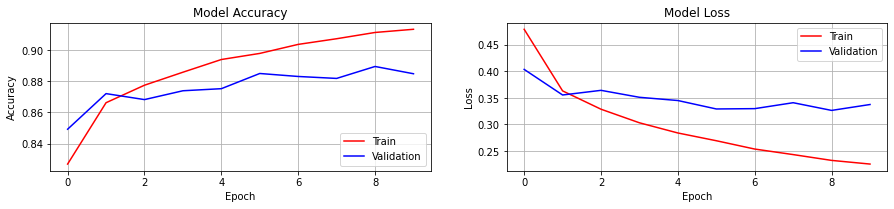

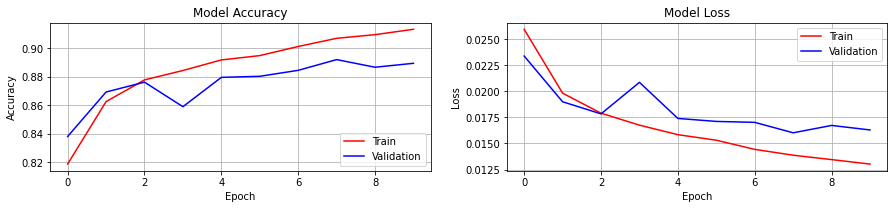

In [ ]:
print('plot Accuracy and loss of train, valid data when Active func=Relu and loss=Crossentropy ')
print('plot Accuracy and loss of train, valid data when Active func=Relu and loss=Mse ')
print('\n')
plot(history_32)
plot(history_MLP_TWO_HIDDENLAYRE_mse)


## Plot (Active func=Tanh and loss=Crossentropy)
## plot ( Active func=Tanh and loss=Mse)

plot Accuracy and loss of train, valid data when Active func=Tanh and loss=Crossentropy 
plot Accuracy and loss of train, valid data when Active func=Tanh and loss=MSE 




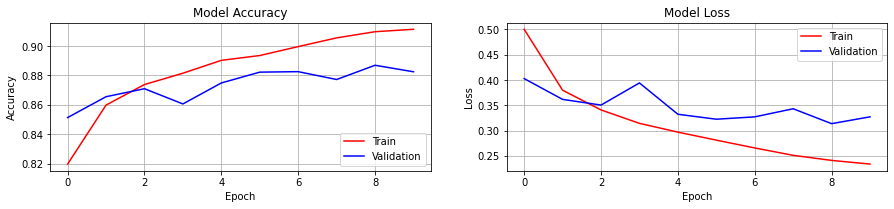

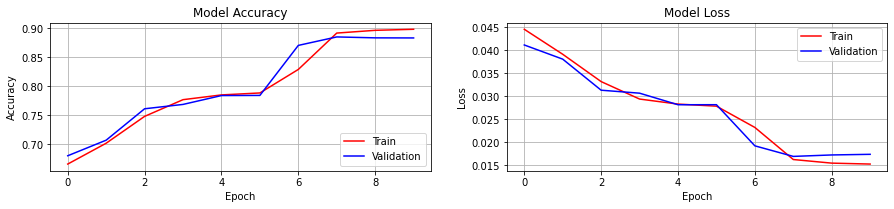

In [ ]:
print('plot Accuracy and loss of train, valid data when Active func=Tanh and loss=Crossentropy ')
print('plot Accuracy and loss of train, valid data when Active func=Tanh and loss=MSE ')

print('\n')
plot(history_MLP_TWO_HIDDENLAYRE_tanh)
plot(history_MLP_TWO_HIDDENLAYRE_tanh_mse)

## Plot (Active func=Sigmoid and loss=Crossentropy)
## plot ( Active func=Sigmoid and loss=Mse)

plot Accuracy and loss of train, valid data when Active func=Sigmoid and loss=crossentropy 
plot Accuracy and loss of train, valid data when Active func=Sigmoid and loss=Mse 




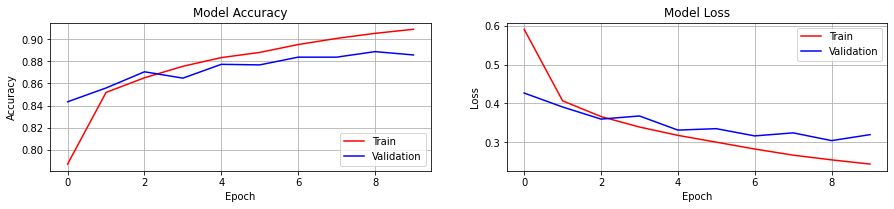

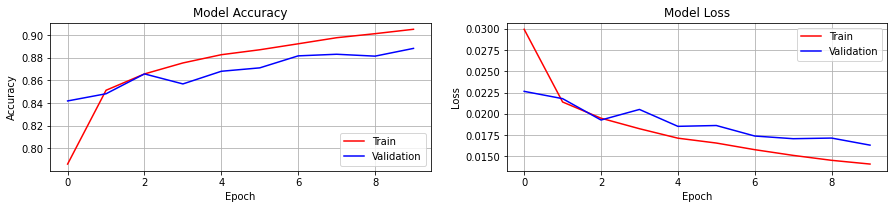

In [ ]:
print('plot Accuracy and loss of train, valid data when Active func=Sigmoid and loss=crossentropy ')
print('plot Accuracy and loss of train, valid data when Active func=Sigmoid and loss=Mse ')
print('\n')
plot(history_MLP_TWO_HIDDENLAYRE_sigmoid)
plot(history_MLP_TWO_HIDDENLAYRE_sigmoid_mse)

## Evaluation , confusionmatrix and show image (actual label vs prdiction label)

 classified correctly of Relu When loss is crossentropy = 8829
 classified incorrectly of Relu When loss is crossentropy = 1171




 classified correctly of Relu When loss is Mse = 8808
 classified incorrectly of Relu When  loss is Mse = 1192




 classified correctly of Tanh When loss is crossentropy= 8721
 classified incorrectly of Tanh When loss is crossentropy = 1279




 classified correctly of Tanh When loss is Mse = 8722
 classified incorrectly of Tanh When loss is Mse = 1278




 classified correctly of Sigmoid When loss is crossentropy = 8770
 classified incorrectly of Sigmoid When loss is crossentropy = 1230




 classified correctly of Sigmoid When loss is Mse = 8770
 classified correctly of Sigmoid When loss is Mse = 1230






----------------------------------------------------------------------------------
--------------------------Accuracy And Loss for Test------------------------------
----------------------------------------------------------------------------------



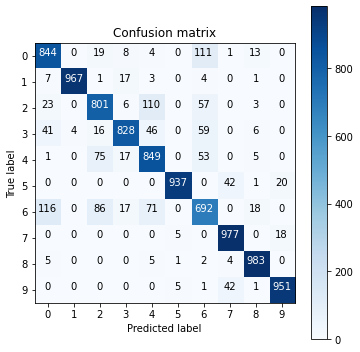

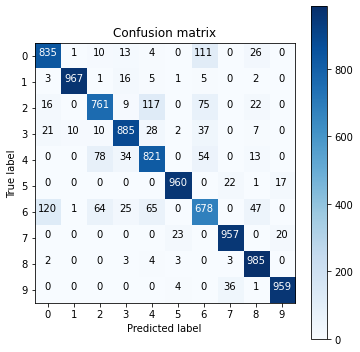

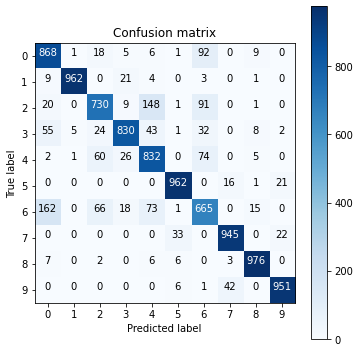

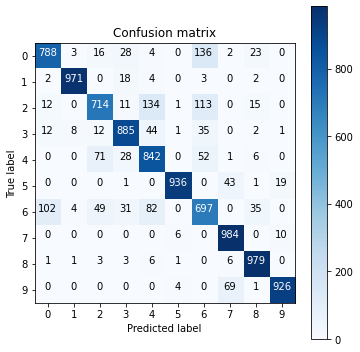

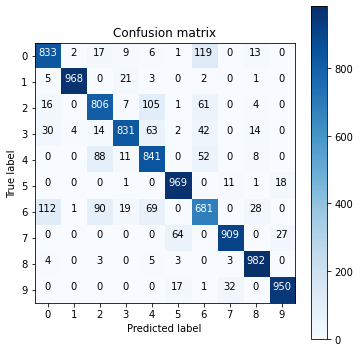

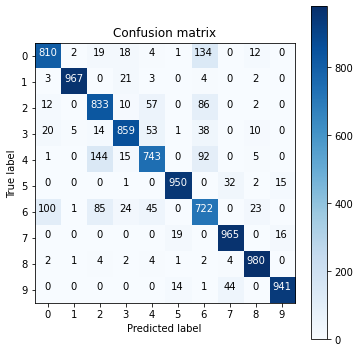

In [ ]:
# Prediction Labels
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)

Y_pred_TWO_HIDDENLAYRE_mse= clf_MLP_TWO_HIDDENLAYRE_mse.predict(X_test)
acc_mse = accuracy_score(y_test, Y_pred_TWO_HIDDENLAYRE_mse)

Y_pred_TWO_HIDDENLAYRE_tanh = clf_MLP_TWO_HIDDENLAYRE_tanh.predict(X_test)
acc_tanh= accuracy_score(y_test, Y_pred_TWO_HIDDENLAYRE_tanh)

Y_pred_TWO_HIDDENLAYRE_tanh_mse = clf_MLP_TWO_HIDDENLAYRE_tanh_mse.predict(X_test)
acc_tanh_mse = accuracy_score(y_test, Y_pred_TWO_HIDDENLAYRE_tanh_mse)

Y_pred_TWO_HIDDENLAYRE_sigmoid = clf_MLP_TWO_HIDDENLAYRE_sigmoid.predict(X_test)
acc_sigmoid = accuracy_score(y_test, Y_pred_TWO_HIDDENLAYRE_sigmoid)

Y_TWO_HIDDENLAYRE_sigmoid_mse = clf_MLP_TWO_HIDDENLAYRE_sigmoid_mse.predict(X_test)
acc_sigmoid_mse = accuracy_score(y_test, Y_TWO_HIDDENLAYRE_sigmoid_mse)

# Evaluate the trained model
correct_indices_64 = np.nonzero(Y_pred_64 == y_test)[0]
incorrect_indices_64 = np.nonzero(Y_pred_64 != y_test)[0]
loss_64=(len(incorrect_indices_64) / (len(incorrect_indices_64) + len(correct_indices_64)))

correct_indices_mse = np.nonzero(Y_pred_TWO_HIDDENLAYRE_mse == y_test)[0]
incorrect_indices_mse = np.nonzero(Y_pred_TWO_HIDDENLAYRE_mse != y_test)[0] 
loss_mse=(len(incorrect_indices_mse) / (len(incorrect_indices_mse) + len(correct_indices_mse)))

correct_indices_tanh = np.nonzero(Y_pred_TWO_HIDDENLAYRE_tanh == y_test)[0]
incorrect_indices_tanh = np.nonzero(Y_pred_TWO_HIDDENLAYRE_tanh != y_test)[0]
loss_tanh=(len(incorrect_indices_tanh) / (len(incorrect_indices_tanh) + len(correct_indices_tanh)))

correct_indices_tanh_mse = np.nonzero(Y_pred_TWO_HIDDENLAYRE_tanh_mse == y_test)[0]
incorrect_indices_tanh_mse = np.nonzero(Y_pred_TWO_HIDDENLAYRE_tanh_mse != y_test)[0]
loss_tanh_mse=(len(incorrect_indices_tanh_mse) / (len(incorrect_indices_tanh_mse) + len(correct_indices_tanh_mse)))

correct_indices_sigmoid = np.nonzero(Y_pred_TWO_HIDDENLAYRE_sigmoid == y_test)[0]
incorrect_indices_sigmoid = np.nonzero(Y_pred_TWO_HIDDENLAYRE_sigmoid != y_test)[0]
loss_sigmoid=(len(incorrect_indices_sigmoid) / (len(incorrect_indices_sigmoid) + len(correct_indices_sigmoid)))

correct_indices_sigmoid_mse = np.nonzero(Y_TWO_HIDDENLAYRE_sigmoid_mse == y_test)[0]
incorrect_indices_sigmoid_mse = np.nonzero(Y_TWO_HIDDENLAYRE_sigmoid_mse != y_test)[0]
loss_sigmoid_mse=(len(incorrect_indices_sigmoid_mse) / (len(incorrect_indices_sigmoid_mse) + len(correct_indices_sigmoid_mse)))

print(" classified correctly of Relu When loss is crossentropy =" , len(correct_indices_64))
print(" classified incorrectly of Relu When loss is crossentropy =", len(incorrect_indices_64))
print('\n')
print('\n')
print(" classified correctly of Relu When loss is Mse =" , len(correct_indices_mse))
print(" classified incorrectly of Relu When  loss is Mse =", len(incorrect_indices_mse))
print('\n')
print('\n')
print(" classified correctly of Tanh When loss is crossentropy=", len(correct_indices_tanh))
print(" classified incorrectly of Tanh When loss is crossentropy =", len(incorrect_indices_tanh))
print('\n')
print('\n')
print(" classified correctly of Tanh When loss is Mse =", len(correct_indices_tanh_mse))
print(" classified incorrectly of Tanh When loss is Mse =", len(incorrect_indices_tanh_mse))
print('\n')
print('\n')
print(" classified correctly of Sigmoid When loss is crossentropy =", len(correct_indices_sigmoid))
print(" classified incorrectly of Sigmoid When loss is crossentropy =", len(incorrect_indices_sigmoid))
print('\n')
print('\n')
print(" classified correctly of Sigmoid When loss is Mse =", len(correct_indices_sigmoid_mse))
print(" classified correctly of Sigmoid When loss is Mse =", len(incorrect_indices_sigmoid_mse))
print('\n')
print('\n')

from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1,2,3,4,5,6,7,8,9]
confusion_mtx_relu_cross = confusion_matrix(y_test, Y_pred_64)
confusion_mtx_relu_mse = confusion_matrix(y_test, Y_pred_TWO_HIDDENLAYRE_mse)
confusion_mtx_tanh_cross = confusion_matrix(y_test, Y_pred_TWO_HIDDENLAYRE_tanh)
confusion_mtx_tanh_mse = confusion_matrix(y_test, Y_pred_TWO_HIDDENLAYRE_tanh_mse)
confusion_mtx_sigmoid_cross = confusion_matrix(y_test, Y_pred_TWO_HIDDENLAYRE_sigmoid)
confusion_mtx_sigmoid_mse = confusion_matrix(y_test, Y_TWO_HIDDENLAYRE_sigmoid_mse)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_mtx_relu_cross, class_names)    
plot_confusion_matrix(confusion_mtx_relu_mse, class_names)   
plot_confusion_matrix(confusion_mtx_tanh_cross, class_names)    
plot_confusion_matrix(confusion_mtx_tanh_mse, class_names)    
plot_confusion_matrix(confusion_mtx_sigmoid_cross, class_names)    
plot_confusion_matrix(confusion_mtx_sigmoid_mse, class_names)    
print('\n')
print('----------------------------------------------------------------------------------')
print('--------------------------Accuracy And Loss for Test------------------------------')
print('----------------------------------------------------------------------------------')

print('\n')

print('Active=Relu and loss=Crossentropy ', sep="\n")
print("Accuracy Test of Relu_Crossentropy: %.2f%%" % (acc_64 *100))
print("Loss Test of Relu_Crossentropy: %.2f%%" % (loss_64 *100))

print('\n')
print('\n')
print('Active=Relu and loss=MSE ', sep="\n")
print("Accuracy Test of Relu_Mse: %.2f%%" % (acc_mse *100))
print("Loss Test of Relu_Mse: %.2f%%" % (loss_mse *100))

print('\n')
print('\n')
print('Active=Tanh and loss=Crossentropy ', sep="\n")
print("Accuracy Test of Tanh_Crossentropy: %.2f%%" % (acc_tanh *100))
print("Loss Test of Tanh_Crossentropy: %.2f%%" % (loss_tanh *100))

print('\n')
print('\n')
print('Active=Tanh and loss=Mse   ', sep="\n")
print("Accuracy Test of Tanh_Mse: %.2f%%" % (acc_tanh_mse *100))
print("Loss Test of Tanh_Mse: %.2f%%" % (loss_tanh_mse *100))

print('\n')
print('\n')
print('Active=sigmoid and loss=Crossentropy   ', sep="\n")
print("Accuracy Test of Sigmoid_Crossentropy: %.2f%%" % (acc_sigmoid *100))
print("Loss Test of Sigmoid_Crossentropy: %.2f%%" % (loss_sigmoid *100))

print('\n')
print('\n')
print('Active=sigmoid and loss=Mse   ', sep="\n")
print("Accuracy Test of Sigmoid_Mse: %.2f%%" % (acc_sigmoid_mse *100))
print("Loss Test of Sigmoid_Mse: %.2f%%" % (loss_sigmoid_mse *100))

print('\n')
print('----------------------------------------------------------------------------------')
print('---------------------------------Confusion_matrix---------------------------------')
print('----------------------------------------------------------------------------------')
print('\n')


# ج

## CNN

In [ ]:
(X_train1, y_train1), (X_test1, y_test1) = keras.datasets.fashion_mnist.load_data()
X_train1 = X_train1.reshape(len(X_train1),28,28,1)
X_test1  = X_test1.reshape(len(X_test1),28,28,1)
# Change to float datatype
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')
# Noramlization from [0;255] to [0;1], Scale the data to lie between 0 to 1
X_train1 /= 255
X_test1 /= 255
# convert labels to one-hot vectors
from keras.utils import np_utils
Y_train1 = np_utils.to_categorical(y_train1)
Y_test1 = np_utils.to_categorical(y_test1)

## Create CNN Model(JUST convolution layer) 


In [ ]:
from keras.models import Sequential
from keras.utils import np_utils
from keras import layers

model_ = Sequential()

model_.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model_.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_.add(layers.Flatten())
model_.add(layers.Dense(256, activation='relu'))
model_.add(layers.Dense(10, activation='softmax'))

model_.summary()

tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
# Configure the Network
model_.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        8224      
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_54 (Dense)            (None, 256)               6422784   
                                                                 
 dense_55 (Dense)            (None, 10)                2570      
                                                                 
Total params: 6,433,898
Trainable params: 6,433,898
Non-trainable params: 0
_________________________________________________________________


## Train CNN Model(Fitting)

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history = model_.fit(X_train1, Y_train1, epochs=10, batch_size=64, validation_split=0.2)



Epoch 1/10
750/750 [==============================] - 20s 16ms/step - loss: 0.3899 - accuracy: 0.8620 - val_loss: 0.2864 - val_accuracy: 0.8948
Epoch 2/10
750/750 [==============================] - 12s 15ms/step - loss: 0.2342 - accuracy: 0.9133 - val_loss: 0.2566 - val_accuracy: 0.9068
Epoch 3/10
750/750 [==============================] - 12s 15ms/step - loss: 0.1668 - accuracy: 0.9390 - val_loss: 0.2498 - val_accuracy: 0.9116
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 0.1098 - accuracy: 0.9591 - val_loss: 0.2788 - val_accuracy: 0.9107
Epoch 5/10
750/750 [==============================] - 12s 15ms/step - loss: 0.0710 - accuracy: 0.9736 - val_loss: 0.3076 - val_accuracy: 0.9142
Epoch 6/10
750/750 [==============================] - 12s 15ms/step - loss: 0.0445 - accuracy: 0.9839 - val_loss: 0.3744 - val_accuracy: 0.9082
Epoch 7/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0299 - accuracy: 0.9899 - val_loss: 0.4188 - val_accuracy:

## Plot

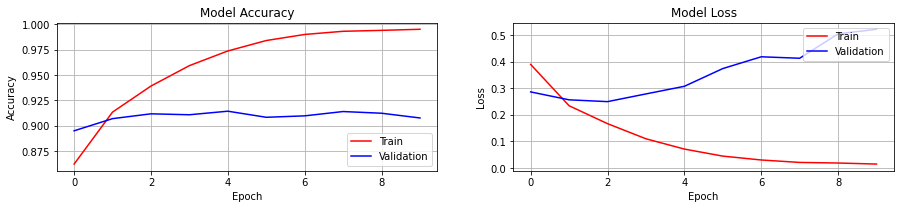

In [ ]:
plot(history)

## Evaluation , confusionmatrix and show image (actual label vs prdiction label)

313/313 [==============================] - 2s 5ms/step - loss: 0.5239 - accuracy: 0.9063
Test Loss 0.5238943099975586
Test Accuracy 0.9063000082969666
 classified correctly 9063
 classified incorrectly 937




----------------------------------------------------------------------------------
-------------------------image with label and Confusion_matrix--------------------
----------------------------------------------------------------------------------




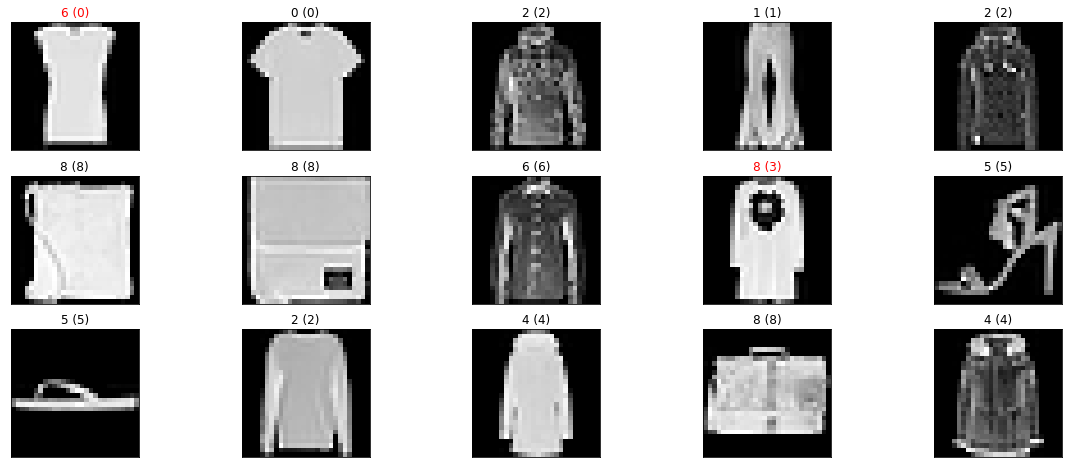

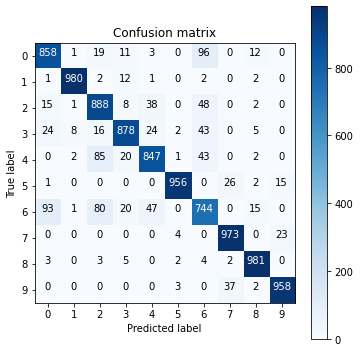

In [ ]:
# Prediction Labels
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)

Y_pred = model_.predict(X_test1)
y_pred = np.argmax(Y_pred, axis=1)

# Evaluate the trained model
[test_loss, test_acc] = model_.evaluate(X_test1, Y_test1)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

correct_indices = np.nonzero(y_pred == y_test1)[0]
incorrect_indices = np.nonzero(y_pred != y_test1)[0]

print(" classified correctly", len(correct_indices))
print(" classified incorrectly", len(incorrect_indices))
print('\n')
print('\n')


figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test1.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(X_test1[index].reshape(28,28), cmap='gray')
    predict_index = y_pred[index]
    true_index = y_test1[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("black" if predict_index == true_index else "red"))


print('----------------------------------------------------------------------------------')
print('-------------------------image with label and Confusion_matrix--------------------')
print('----------------------------------------------------------------------------------')

from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1,2,3,4,5,6,7,8,9]
confusion_mtx_conv = confusion_matrix(y_test1, y_pred)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

plot_confusion_matrix(confusion_mtx_conv, class_names)    
print('\n')

# د 

## Create CNN Model( convolution layer + BatchNormalization + Maxpooling) 


In [ ]:
from keras.models import Sequential
from keras.utils import np_utils
from keras import layers

model_1 = Sequential()

model_1.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model_1.add(BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=2))
model_1.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=2))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(256, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))

model_1.summary()
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
# Configure the Network
model_1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                        

## Train CNN Model(Fitting)

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_1 = model_1.fit(X_train1, Y_train1, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 18s 12ms/step - loss: 0.3827 - accuracy: 0.8636 - val_loss: 0.2870 - val_accuracy: 0.8927
Epoch 2/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2557 - accuracy: 0.9054 - val_loss: 0.2672 - val_accuracy: 0.9016
Epoch 3/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2094 - accuracy: 0.9231 - val_loss: 0.2520 - val_accuracy: 0.9084
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1741 - accuracy: 0.9345 - val_loss: 0.3112 - val_accuracy: 0.8903
Epoch 5/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1520 - accuracy: 0.9434 - val_loss: 0.3178 - val_accuracy: 0.8898
Epoch 6/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1291 - accuracy: 0.9514 - val_loss: 0.3051 - val_accuracy: 0.9033
Epoch 7/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1091 - accuracy: 0.9593 - val_loss: 0.2759 - val_accuracy: 0.917

## plot

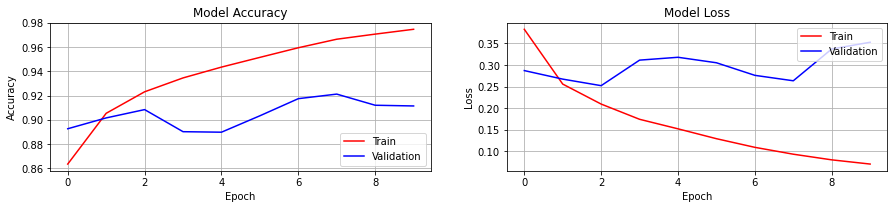

In [ ]:
plot(history_1)

## Evaluation , confusionmatrix and show image (actual label vs prdiction label)

313/313 [==============================] - 2s 5ms/step - loss: 0.3971 - accuracy: 0.9017
Test Loss 0.39710959792137146
Test Accuracy 0.9017000198364258
 classified correctly 9017
 classified incorrectly 983




----------------------------------------------------------------------------------
-------------------------image with label and Confusion_matrix--------------------
----------------------------------------------------------------------------------




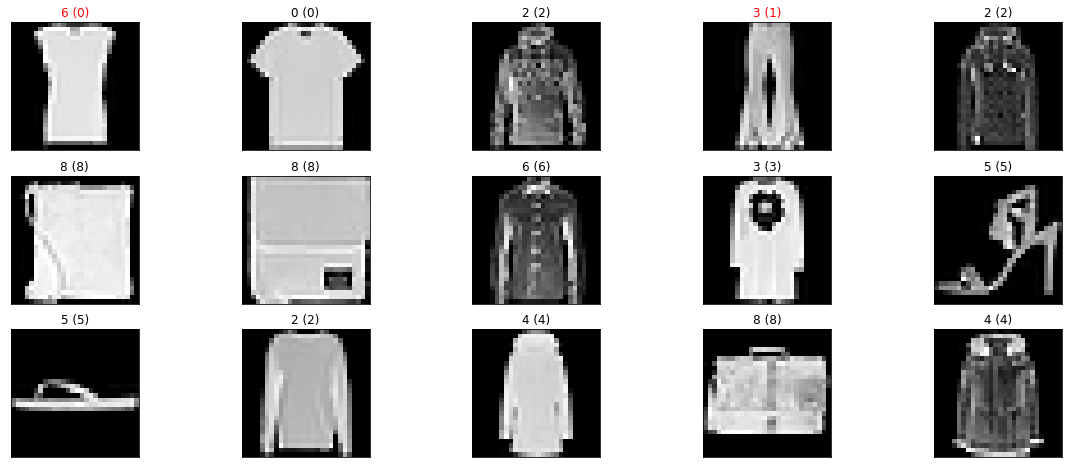

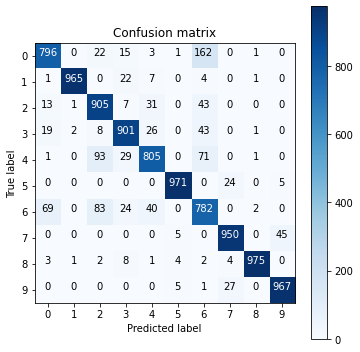

In [ ]:
# Prediction Labels
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)

Y_pred_1 = model_1.predict(X_test1)
y_pred_1 = np.argmax(Y_pred_1, axis=1)

# Evaluate the trained model
[test_loss_1, test_acc_1] = model_1.evaluate(X_test1, Y_test1)
print("Test Loss", test_loss_1)
print("Test Accuracy", test_acc_1)

correct_indices_1 = np.nonzero(y_pred_1 == y_test1)[0]
incorrect_indices_1 = np.nonzero(y_pred_1 != y_test1)[0]

print(" classified correctly", len(correct_indices_1))
print(" classified incorrectly", len(incorrect_indices_1))
print('\n')
print('\n')
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test1.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(X_test1[index].reshape(28,28), cmap='gray')
    predict_index = y_pred_1[index]
    true_index = y_test1[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("black" if predict_index == true_index else "red"))


print('----------------------------------------------------------------------------------')
print('-------------------------image with label and Confusion_matrix--------------------')
print('----------------------------------------------------------------------------------')

from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1,2,3,4,5,6,7,8,9]
confusion_mtx_pooling = confusion_matrix(y_test1, y_pred_1)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_mtx_pooling, class_names)    
print('\n')

# ه 

# First (Dropout 0.3,0.3,0.5 without Batchnormalization)
## Create CNN model

In [ ]:
from keras.models import Sequential
from keras.utils import np_utils
from keras import layers

model_2 = Sequential()

model_2.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model_2.add(layers.MaxPooling2D(pool_size=2))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=2))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()

tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model_2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 32)         

## Train model (Fitting)

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_2 = model_2.fit(X_train1, Y_train1, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 9s 11ms/step - loss: 0.6338 - accuracy: 0.7658 - val_loss: 0.4082 - val_accuracy: 0.8496
Epoch 2/10
750/750 [==============================] - 8s 10ms/step - loss: 0.4334 - accuracy: 0.8427 - val_loss: 0.3422 - val_accuracy: 0.8773
Epoch 3/10
750/750 [==============================] - 7s 10ms/step - loss: 0.3843 - accuracy: 0.8612 - val_loss: 0.3143 - val_accuracy: 0.8857
Epoch 4/10
750/750 [==============================] - 8s 11ms/step - loss: 0.3534 - accuracy: 0.8708 - val_loss: 0.2877 - val_accuracy: 0.8934
Epoch 5/10
750/750 [==============================] - 8s 10ms/step - loss: 0.3330 - accuracy: 0.8770 - val_loss: 0.2719 - val_accuracy: 0.8988
Epoch 6/10
750/750 [==============================] - 8s 10ms/step - loss: 0.3161 - accuracy: 0.8846 - val_loss: 0.2639 - val_accuracy: 0.9009
Epoch 7/10
750/750 [==============================] - 8s 10ms/step - loss: 0.3028 - accuracy: 0.8891 - val_loss: 0.2550 - val_accuracy: 0.9060

## plot

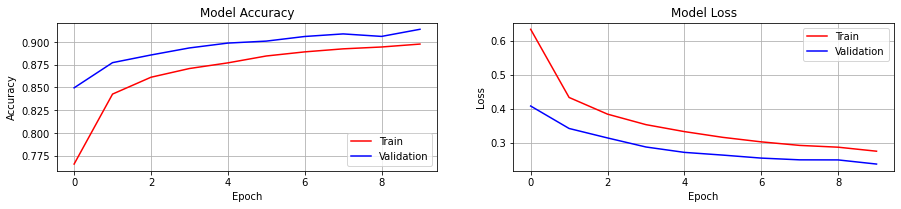

In [ ]:

plot(history_2)

## Evaluation , confusionmatrix and show image (actual label vs prdiction label)

313/313 [==============================] - 2s 5ms/step - loss: 0.2518 - accuracy: 0.9056
Test Loss 0.25178563594818115
Test Accuracy 0.9056000113487244
 classified correctly 9056
 classified incorrectly 944




----------------------------------------------------------------------------------
-------------------------image with label and Confusion_matrix--------------------
----------------------------------------------------------------------------------




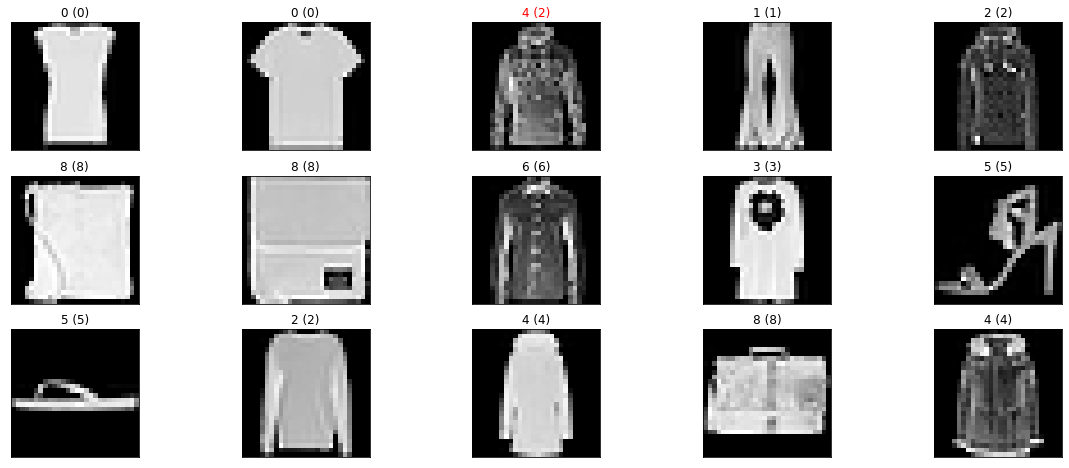

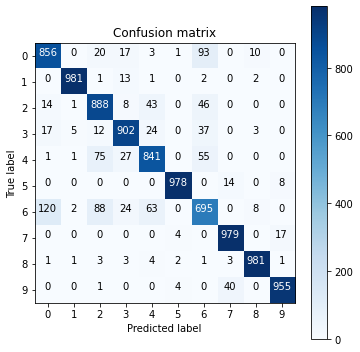

In [ ]:
# Prediction Labels
# Prediction Labels
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
Y_pred_2 = model_2.predict(X_test1)
y_pred_2 = np.argmax(Y_pred_2, axis=1)

# Evaluate the trained model
[test_loss_2, test_acc_2] = model_2.evaluate(X_test1, Y_test1)
print("Test Loss", test_loss_2)
print("Test Accuracy", test_acc_2)

correct_indices_2 = np.nonzero(y_pred_2 == y_test1)[0]
incorrect_indices_2 = np.nonzero(y_pred_2 != y_test1)[0]

print(" classified correctly", len(correct_indices_2))
print(" classified incorrectly", len(incorrect_indices_2))
print('\n')
print('\n')
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test1.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(X_test1[index].reshape(28,28), cmap='gray')
    predict_index = y_pred_2[index]
    true_index = y_test1[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("black" if predict_index == true_index else "red"))


print('----------------------------------------------------------------------------------')
print('-------------------------image with label and Confusion_matrix--------------------')
print('----------------------------------------------------------------------------------')
from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1,2,3,4,5,6,7,8,9]
confusion_mtx_pooling_ = confusion_matrix(y_test1, y_pred_2)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

plot_confusion_matrix(confusion_mtx_pooling_, class_names)    
print('\n')

# Second (Dropout 0.2,0.2,0.2 without Batchnormalization)
## Create CNN model

In [ ]:
model_3 = Sequential()

model_3.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model_3.add(layers.MaxPooling2D(pool_size=2))
model_3.add(layers.Dropout(0.2))

model_3.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_3.add(layers.MaxPooling2D(pool_size=2))
model_3.add(layers.Dropout(0.2))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()

tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model_3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 32)         

## Train model (Fitting) and plot model accuracy and model loss for tarin and validation data

Epoch 1/10
750/750 [==============================] - 9s 11ms/step - loss: 0.5467 - accuracy: 0.7996 - val_loss: 0.3947 - val_accuracy: 0.8581
Epoch 2/10
750/750 [==============================] - 8s 10ms/step - loss: 0.3713 - accuracy: 0.8639 - val_loss: 0.3145 - val_accuracy: 0.8838
Epoch 3/10
750/750 [==============================] - 8s 10ms/step - loss: 0.3249 - accuracy: 0.8818 - val_loss: 0.2942 - val_accuracy: 0.8906
Epoch 4/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2955 - accuracy: 0.8914 - val_loss: 0.2717 - val_accuracy: 0.9000
Epoch 5/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2742 - accuracy: 0.8981 - val_loss: 0.2527 - val_accuracy: 0.9054
Epoch 6/10
750/750 [==============================] - 7s 10ms/step - loss: 0.2578 - accuracy: 0.9050 - val_loss: 0.2477 - val_accuracy: 0.9072
Epoch 7/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2424 - accuracy: 0.9098 - val_loss: 0.2453 - val_accuracy: 0.9097

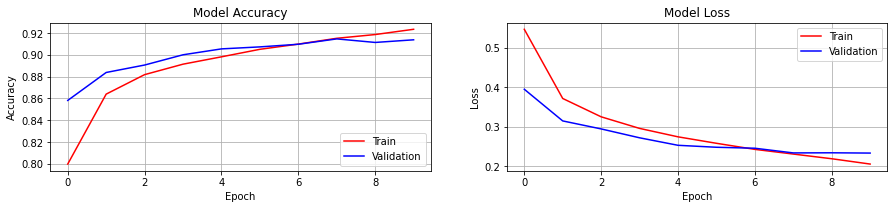

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_3 = model_3.fit(X_train1, Y_train1, batch_size=64, epochs=10, validation_split=0.2)
plot(history_3)

## Evaluation , confusionmatrix and show image (actual label vs prdiction label)

313/313 [==============================] - 2s 5ms/step - loss: 0.2461 - accuracy: 0.9089
Test Loss 0.246100515127182
Test Accuracy 0.9089000225067139
 classified correctly 9089
 classified incorrectly 911




----------------------------------------------------------------------------------
-------------------------image with label and Confusion_matrix--------------------
----------------------------------------------------------------------------------




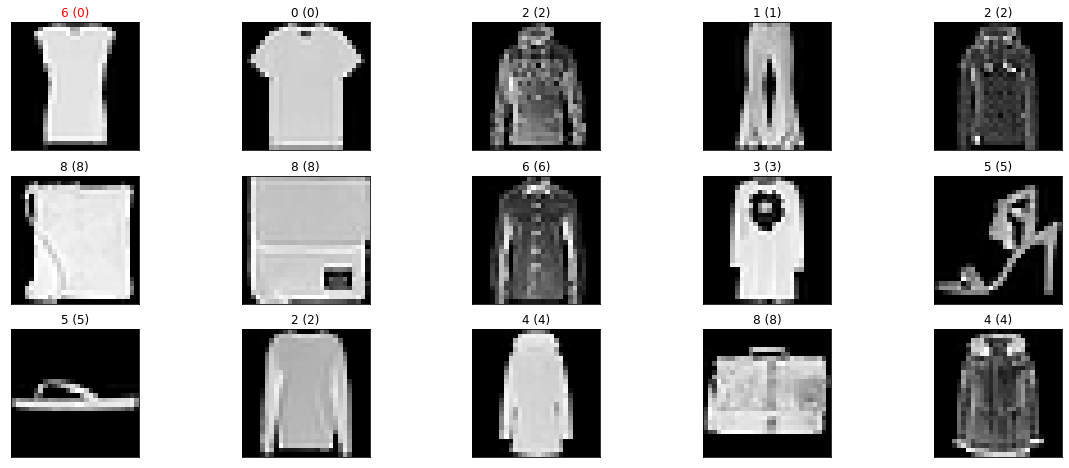

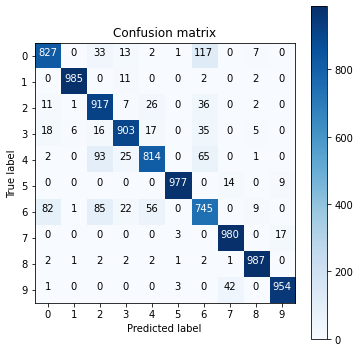

In [ ]:
# Prediction Labels
# Prediction Labels
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
Y_pred_3 = model_3.predict(X_test1)
y_pred_3 = np.argmax(Y_pred_3, axis=1)

# Evaluate the trained model
[test_loss_3, test_acc_3] = model_3.evaluate(X_test1, Y_test1)
print("Test Loss", test_loss_3)
print("Test Accuracy", test_acc_3)

correct_indices_3 = np.nonzero(y_pred_3 == y_test1)[0]
incorrect_indices_3 = np.nonzero(y_pred_3 != y_test1)[0]

print(" classified correctly", len(correct_indices_3))
print(" classified incorrectly", len(incorrect_indices_3))
print('\n')
print('\n')
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test1.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(X_test1[index].reshape(28,28), cmap='gray')
    predict_index = y_pred_3[index]
    true_index = y_test1[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("black" if predict_index == true_index else "red"))


print('----------------------------------------------------------------------------------')
print('-------------------------image with label and Confusion_matrix--------------------')
print('----------------------------------------------------------------------------------')
from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1,2,3,4,5,6,7,8,9]
confusion_mtx_pooling_3 = confusion_matrix(y_test1, y_pred_3)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

plot_confusion_matrix(confusion_mtx_pooling_3, class_names)    
print('\n')

# Third (Dropout 0.2,0.2,0.2 + Batchnormalization)
## Create CNN model

In [ ]:
model_4 = Sequential()

model_4.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model_4.add(BatchNormalization())
model_4.add(layers.MaxPooling2D(pool_size=2))
model_4.add(layers.Dropout(0.2))

model_4.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(layers.MaxPooling2D(pool_size=2))
model_4.add(layers.Dropout(0.2))

model_4.add(layers.Flatten())
model_4.add(layers.Dense(256, activation='relu'))
model_4.add(layers.Dropout(0.2))
model_4.add(layers.Dense(10, activation='softmax'))

model_4.summary()

tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model_4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 32)      

## Train model(Fittnig)

Epoch 1/10
750/750 [==============================] - 10s 12ms/step - loss: 0.4853 - accuracy: 0.8265 - val_loss: 0.3472 - val_accuracy: 0.8738
Epoch 2/10
750/750 [==============================] - 8s 11ms/step - loss: 0.3273 - accuracy: 0.8792 - val_loss: 0.2801 - val_accuracy: 0.8981
Epoch 3/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2916 - accuracy: 0.8916 - val_loss: 0.2571 - val_accuracy: 0.9095
Epoch 4/10
750/750 [==============================] - 9s 11ms/step - loss: 0.2602 - accuracy: 0.9039 - val_loss: 0.2955 - val_accuracy: 0.8934
Epoch 5/10
750/750 [==============================] - 9s 11ms/step - loss: 0.2435 - accuracy: 0.9104 - val_loss: 0.2821 - val_accuracy: 0.8991
Epoch 6/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2267 - accuracy: 0.9157 - val_loss: 0.3244 - val_accuracy: 0.8857
Epoch 7/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2140 - accuracy: 0.9192 - val_loss: 0.2487 - val_accuracy: 0.915

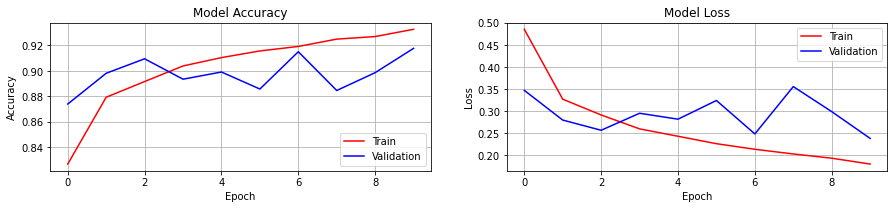

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_4 = model_4.fit(X_train1, Y_train1, batch_size=64, epochs=10, validation_split=0.2)
plot(history_4)

## Evaluation , confusionmatrix and show image (actual label vs prdiction label)

313/313 [==============================] - 2s 5ms/step - loss: 0.2631 - accuracy: 0.9105
Test Loss 0.2631116211414337
Test Accuracy 0.9104999899864197
 classified correctly 9105
 classified incorrectly 895




----------------------------------------------------------------------------------
-------------------------image with label and Confusion_matrix--------------------
----------------------------------------------------------------------------------




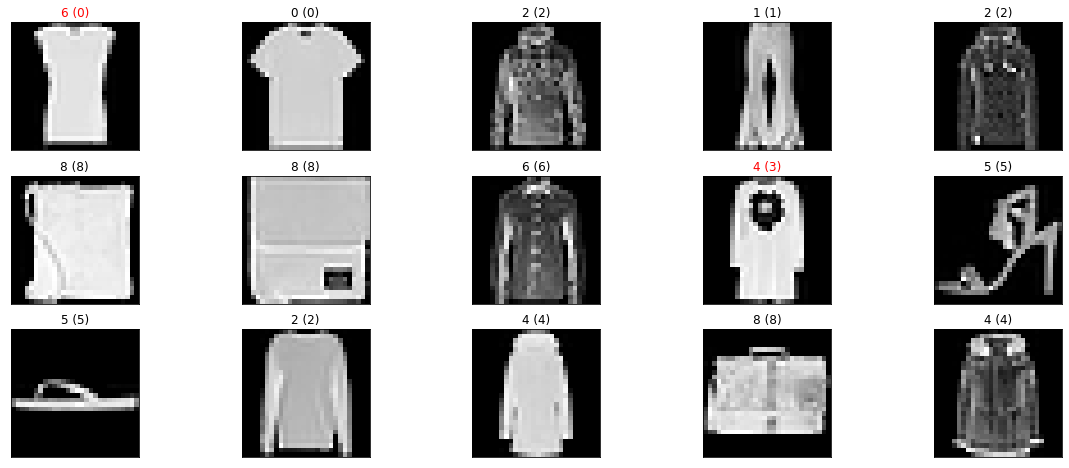

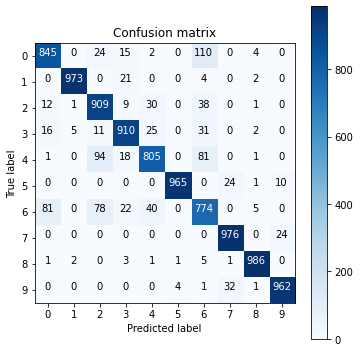

In [ ]:
# Prediction Labels
# Prediction Labels
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
Y_pred_4 = model_4.predict(X_test1)
y_pred_4 = np.argmax(Y_pred_4, axis=1)

# Evaluate the trained model
[test_loss_4, test_acc_4] = model_4.evaluate(X_test1, Y_test1)
print("Test Loss", test_loss_4)
print("Test Accuracy", test_acc_4)

correct_indices_4 = np.nonzero(y_pred_4 == y_test1)[0]
incorrect_indices_4 = np.nonzero(y_pred_4 != y_test1)[0]

print(" classified correctly", len(correct_indices_4))
print(" classified incorrectly", len(incorrect_indices_4))
print('\n')
print('\n')
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test1.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(X_test1[index].reshape(28,28), cmap='gray')
    predict_index = y_pred_4[index]
    true_index = y_test1[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("black" if predict_index == true_index else "red"))


print('----------------------------------------------------------------------------------')
print('-------------------------image with label and Confusion_matrix--------------------')
print('----------------------------------------------------------------------------------')
from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1,2,3,4,5,6,7,8,9]
confusion_mtx_pooling_4 = confusion_matrix(y_test1, y_pred_4)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

plot_confusion_matrix(confusion_mtx_pooling_4, class_names)    
print('\n')